<a href="https://colab.research.google.com/github/22anirudhk/gum-disease-recognition/blob/master/CNN_Synopsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import zipfile
import tensorflow as tf 


#Connect the machine to google drive
drive.mount("/content/drive")
 
#Get the diseased images
zipfile_a = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Complete_Diseased.zip", 'r')
zipfile_a.extractall("/content/Synopsys/CNN-Images") 
zipfile_a.close()

#Get the healthy images
zipfile_a = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Complete_Healthy.zip", 'r')
zipfile_a.extractall("/content/Synopsys/CNN-Images") 
zipfile_a.close()

#<-------------------------------------------------old code------------------------------------------------------------>
#HALF
# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/half_diseased.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()


# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/half_healthy.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


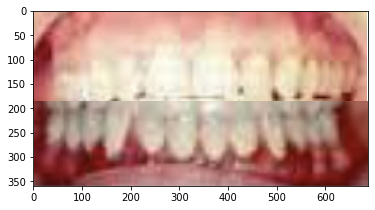

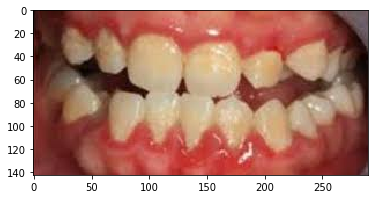

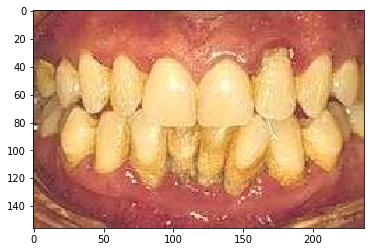

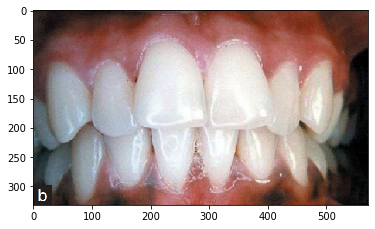

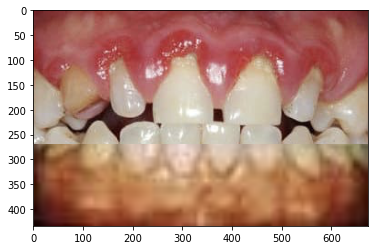

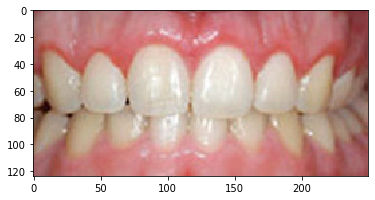

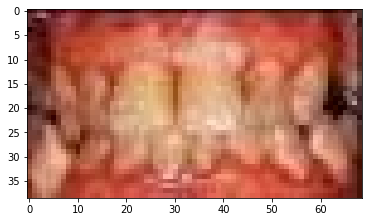

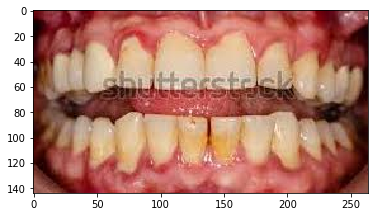

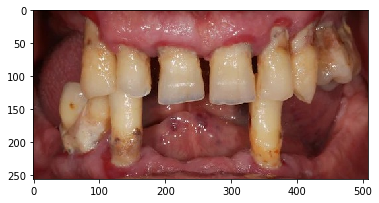

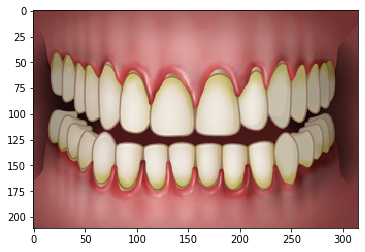

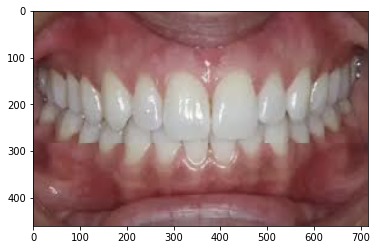

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#Get local directory of the images
DATADIR = "/content/Synopsys/CNN-Images"
Categories = ['Complete_Diseased', 'Complete_Healthy']

#Store training data
training_data = []

#Create the training data
def create_training_data() :
  counter = 0

  #Used to look through images that are being added to see if they are fine
  NUM_IMAGES_TO_SHOW = 10

  #For each image, connect it to a label describing if it is diseased or healthy
  for category in Categories:
     path = os.path.join(DATADIR, category) #connect the datadirectory to the index in category
     class_num = Categories.index(category) #0 for diseased
     for img in os.listdir(path):
       #Convert images color format to one that is readable
       img_arr = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
       b,g,r = cv2.split(img_arr) 
       img_arr = cv2.merge([r,g,b])
       try:
         #Resize the images to make all of them the same (normalizing)
         plt.imshow(img_arr)
         IMG_WIDTH = 350 #So 20,000 pixels
         IMG_LENGTH = 700
         new_array = cv2.resize(img_arr, (IMG_WIDTH, IMG_LENGTH))
         training_data.append([new_array, class_num])
       except Exception as e:
         pass
       if(counter < NUM_IMAGES_TO_SHOW):
         plt.show()
       counter += 1

#Create the data
create_training_data()

#randomize image set
import random
random.shuffle(training_data)

In [ ]:
#Store the inputs
X = []

#Store the outputs
y = []

print(str(len(training_data)) + " images in the training set.")

#Split the images from their labels
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)

IMG_WIDTH = 350 #So 20,000 pixels
IMG_LENGTH = 700

#Reshape the array of inputs so it is readable by the network
X = X.reshape(-1, IMG_WIDTH, IMG_LENGTH, 3) 


#Store the input data in a file.
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

#Store the output data in a file.
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#<-------------------------------------------------old code------------------------------------------------------------>
#https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5 GOOD
#THIS CAUSED A PROBLEM for the dimensions
#-1 connects to how many features you have and 3 is for color

2229 images in the training set.


In [ ]:
#Imports
import pickle
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold   
import numpy as np
import time
from tensorboardcolab import * 
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model

#Install tensorboard which is a tool to display graphs.
!pip install tensorboardcolab

#Make sure it is installed.
try:
  %tensorflow_version 2.x
except Exception:
  pass

#Load tensorboard
%load_ext tensorboard


#Method to create a convolutional neural network with an input layer, two middle layers, one layer to condense the data, and an output layer.
def make_model():
  print("Creating model.")
  print()
    
  #Name of the model
  NAME = "Disease-Identifer-cnn-64x3-{}".format(int(time.time())) #Store the model with a time


  #Add first layer
  model = Sequential() 
  model.add(Conv2D(64, (2,2), input_shape = X.shape[1:])) #3,3 is the size of the convolution #2,2 is strieds was 2x2 before
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))


  #Add second layer
  model.add(Conv2D(64, (2,2))) #2,2 is conv check layer
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))


  #Last layer that has 1d version of the data from the 2,2 convolutional layers
  model.add(Flatten()) #converts 3d maps to 1d vectors
  model.add(Dense(64))

  #Add last layer
  model.add(Dense(1))
  model.add(Activation("sigmoid"))

  #Create the model with certain parameters.
  model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

  print()
  print("Model created.")

  return model


print("Creating folds and loading in data.")

#Number of splits for cross validation.
num_splits = 3 # // !!!!! before 5
kf = KFold(n_splits = num_splits)

#Average accuracy
average = 0

#Load the images
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#Normalize the images: Makes each pixel value scale down from [0,255] to [0, 1]. Ex: 194--> ~0.76 
X[:] = [value / 255.0 for value in X] 


print("Running the fold process.")

#Begin the cross validation process to test the model's accuracy
for train_index, val_index in kf.split(X):
 
  #Separate the training data from the testing data
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  #Create the model for this fold
  myModel = make_model()

  print("Fitting the model within the folding process.")
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%m%d%Y-Training-%S-kfold5-secondtry"))
  tensor_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  #Fit the model to the testing data // !!!!! before 6 epochs
  myModel.fit(np.float64(X_train), np.float64(y_train), epochs = 6, batch_size = 64, shuffle=True, verbose = 0, callbacks=[tensor_callback]) #callbacks=[saveBestModel]) #, callbacks=[TensorBoardColabCallback(tbc)]
  
  #Add information to a file for graphs.
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%m%d%Y-Evaluation-%S-New"))
  tensor_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  #Test the model's accuracy.
  evaluate = myModel.evaluate(X_val,y_val, callbacks=[tensor_callback])[1]

  #Print accuracy for this fold
  average += evaluate

  print('Validation accuracy: ' + str(evaluate))
  print("------------------------------------------------")

print("Accuracy: " + str(average / num_splits))

myModel.save("/content/Synopsys/CNN-Images/model-lastfold-86.37.model")
myModel.save_weights("/content/Synopsys/CNN-Images/model-weights-lastfold-86.37.hdf5")



# writer = tbc.get_writer() # To create a FileWriter
# writer.add_graph(tf.get_default_graph()) # add the graph 
# writer.flush() 

Using TensorFlow backend.


TensorFlow is already loaded. Please restart the runtime to change versions.
Creating folds and loading in data.
Running the fold process.
Creating model.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model created.
Fitting the model within the folding process.
Train on 2229 samples
Epoch 1/3
2229/2229 [==============================] - 981s 440ms/sample - loss: 0.7040 - acc: 0.6393
Epoch 2/3
2229/2229 [==============================] - 985s 442ms/sample - loss: 0.5515 - acc: 0.7299
Epoch 3/3
743/743 [==============================] - 28s 38ms/sample - loss: 0.3780 - acc: 0.8062
Validation accuracy: 0.80619115
------------------------------------------------
Creating model.


Model created.
Fitting the model within the folding process.
Train on 2229 samples
Epoch 1/3
2229/2229 [==============================] - 1008s 452ms/sample - loss: 0.6433 - acc: 0.675

In [ ]:

%tensorboard --logdir logs

In [ ]:
#old testing code



#<-------------------------------------------------old code------------------------------------------------------------>


# import cv2
# import tensorflow as tf

# categs = ["Diseased_Testing", "Healthy_Testing"]

# def setup(filepath):
#   IMG_WIDTH = 250
#   IMG_LENGTH = 500
#   img_arr = cv2.imread(filepath, cv2.IMREAD_COLOR)
#   new_arr = cv2.resize(img_arr, (IMG_WIDTH, IMG_HEIGHT))
#   return new_arr.reshape(-1, IMG_WIDTH, IMG_LENGTH)


#<-------------------------------------------------old code------------------------------------------------------------>
# Old training code (before cross validation)

# #open the images
# import pickle
# from tensorflow.keras.callbacks import TensorBoard
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# import numpy as np
# import time



# #Creates the CNN model
# def make_model():
    
#   #Name and tensorboard

#   NAME = "Disease-Identifer-cnn-64x3-{}".format(int(time.time())) #Store the model with a time

#   # !pip install tensorboardcolab
#   # from tensorboardcolab import * 
#   # tbc = TensorBoardColab() # To create a tensorboardcolab object it will automatically creat a link
#   # writer = tbc.get_writer() # To create a FileWriter
#   # writer.add_graph(tf.get_default_graph()) # add the graph 
#   # writer.flush() 
 

#   #Load the images

#   X = pickle.load(open("X.pickle", "rb"))
#   y = pickle.load(open("y.pickle", "rb"))


#   # X[:] = [value / 255.0 for value in X] 
#   #Eg.- A pixel has a value of 223. 223 gets multiplied by 1/255 and the original 223 is replaced by the result 0.87 (223x 1/255 = 0.87).


#   #Add first layer
#   model = Sequential() 
#   model.add(Conv2D(64, (2,2), input_shape = X.shape[1:])) #3,3 is the size of the convolution #2,2 is strieds
#   model.add(Activation("relu"))
#   model.add(MaxPooling2D(pool_size = (2,2)))


#   #Add second layer
#   model.add(Conv2D(64, (2,2))) #2,2 is conv check layer
#   model.add(Activation("relu"))
#   model.add(MaxPooling2D(pool_size = (2,2)))


#   #Last layer that has 1d version of the data from the 2,2 convolutional layers
#   model.add(Flatten()) #converts 3d maps to 1d vectors
#   model.add(Dense(64))

#   #Add last layer
#   model.add(Dense(1))
#   model.add(Activation("sigmoid"))

#   model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy']) #can do loss = "category" later
#   #adam is a special optimizer

#   #print(X.dtype)
#   #D(ata)TYPE OF X WAS WRONG

#   #Get best model:
#   best_weights_filepath = '/content/Synopsys/best_weights.hdf5'

#   #Verbose just means you want it to print how it's going
#   saveBestModel = ModelCheckpoint(best_weights_filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')

#   model.fit(np.float64(X), np.float64(y), epochs = 3, batch_size = 32, validation_split = 0.05, shuffle=True, callbacks=[saveBestModel]) #, callbacks=[TensorBoardColabCallback(tbc)]
#   #can even pass epochs = "" as parameter

#   model.load_weights(best_weights_filepath)

#   return model


# myModel = make_model()

In [ ]:
#Second iteration of testing code(old method that works)
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf 
# import os
# import cv2


# DATADIR = "/content/Synopsys/CNN-Images"
# Categories = ['Test_Diseased', 'Test_Healthy']

# # def prepare(filepath):
# #   IMG_WIDTH = 250 #So 20,000 pixels
# #   IMG_LENGTH = 500
# #   img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
# #   new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_LENGTH))
# #   return new_array.reshape(IMG_WIDTH, IMG_LENGTH, )

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Test_Diseased.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Test_Healthy.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()


# DATADIR = "/content/Synopsys/CNN-Images"
# Categories = ['Test_Diseased', 'Test_Healthy']

# testing_data = []
# NUM_IMAGES_TO_SHOW = 0

# def create_testing_data() :
#   counter = 0
#   for category in Categories:
#      path = os.path.join(DATADIR, category) #connect the datadirectory to the index in category
#      class_num = Categories.index(category) #0 for diseased
#      for img in os.listdir(path):
#        if(not img.endswith(".DS_Store")):
#          try:
#            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
#            b,g,r = cv2.split(img_array) 
#            img_array = cv2.merge([r,g,b])

#            plt.imshow(img_array)
#            #plt.show()
#            IMG_WIDTH = 350 #So 20,000 pixels
#            IMG_LENGTH = 700
#            new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_LENGTH))
#            testing_data.append([new_array, class_num])
#          except Exception as e:
#            print(path + img)
#            pass
#          if(counter < NUM_IMAGES_TO_SHOW):
#            plt.show()
#            counter += 1
       
       


# create_testing_data()

# X = []
# y = []

# for features, label in testing_data:
#   X.append(features)
#   y.append(label)

# X = np.array(X)
# X = X.reshape(-1, 350, 700, 3)

# # X[:] = [value / 255.0 for value in X]

# y = np.array(y)

# model = tf.keras.models.load_model('/content/Synopsys/CNN-Images/10-epoch-two-layer_relu_64_2x2.model')
# model.load_weights('/content/Synopsys/best_weights.hdf5')

# prediction = model.evaluate(np.float64(X), np.float64(y), verbose = 2)


In [ ]:
#First iteration of testing code

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf 
# import os
# import cv2
# import zipfile


# init = tf.initialize_all_variables()
# sess = tf.Session()
# sess.run(init)

# model = tf.keras.models.load_model('/content/Synopsys/CNN-Images/93-epoch3-two-layer_relu_64_2x2.model')

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Test_Diseased.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Synopsys/Test_Healthy.zip", 'r')
# zip_ref.extractall("/content/Synopsys/CNN-Images") 
# zip_ref.close()

# #You could additionally resize and scale images before tseting

# num_correct = 0


# DATADIR = "/content/Synopsys/CNN-Images"
# Categories = ['Test_Diseased', 'Test_Healthy']

# # def test() :
# #   for category in Categories:
# #      path = os.path.join(DATADIR, category) #connect the datadirectory to the index in category
# #      class_num = Categories.index(category) #0 for diseased
# #      for img in os.listdir(path):
# #        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
# #        plt.imshow(img_array)
# #        IMG_WIDTH = 250
# #        IMG_LENGTH = 500
# #        new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_LENGTH))
         
# #        prediction = model.predict([new_array])
# #        print("Prediction is: " + prediction + " and category is: " + category)
# #        if(prediction == category):
# #            num_correct+=1
#         #  test()
      

# num_diseased_correct = 0
# num_healthy_correct = 0
         
# def prepare(img_array):
#   IMG_WIDTH = 250 #So 20,000 pixels
#   IMG_LENGTH = 500
#   new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_LENGTH))
#   return new_array.reshape(-1, IMG_WIDTH, IMG_LENGTH, 1)

# #Go through all diseased images
# for img in os.listdir('/content/Synopsys/CNN-Images/Test_Diseased/'):
#     img_array = cv2.imread(os.path.join('/content/Synopsys/CNN-Images/Test_Diseased/', img), cv2.IMREAD_COLOR)
#     print("Path is " + path)
#     prediction = model.predict([prepare(img_array)])
#     if prediction == 0:
#       num_diseased_correct += 1
#     print("Diseased prediction is " + prediction)
      

# #Go through all healthy images
# for filename in os.listdir('/content/Synopsys/CNN-Images/Test_Healthy/'):
#     img_array = cv2.imread(os.path.join('/content/Synopsys/CNN-Images/Test_Healthy/', img), cv2.IMREAD_COLOR)
#     path = "/content/Synopsys/CNN-Images/Test_Healthy/" + img
#     print("Path is " + path)
#     prediction = model.predict([prepare(img_array)])
#     if prediction == 1:
#       num_healthy_correct += 1
#     print("Healthy prediction is " + prediction)

# print(num_diseased_correct)
# print(num_healthy_correct)

# # pickle_out = open("testingX.pickle", "wb")
# # pickle.dump(testingX, pickle_out)
# # pickle_out.close()

# # pickle_out = open("testingy.pickle", "wb")
# # pickle.dump(testingy, pickle_out)
# # pickle_out.close()

# # xPick = pickle.load(open("testingX.pickle", "rb"))
# # yPick = pickle.load(open("testingy.pickle", "rb"))

In [ ]:


#Done this already